<a href="https://colab.research.google.com/github/Alepescinaa/ScientificTools/blob/main/CompressedSensingEx2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercises: compressed sensing


In this exercise we will employ compressed sensing for the reconstruction of a high-dimensional solution from a sparse set of random measurements.

Date: 2024

Course: 056936 - SCIENTIFIC COMPUTING TOOLS FOR ADVANCED MATHEMATICAL MODELLING (PAGANI STEFANO) [2023-24].


In [1]:
# imports

import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cvx


Consider two different cases of reentrant activity (second one is commented).

In [102]:
n=100
L=20

x=np.arange(-L,L,2*L/n)
y=x

#print(x)
#print(y)

count_samples = 0

Xd=np.zeros((len(x)**2,10*n))
Td=np.zeros((len(x),len(x),10*n))
for ind_random in range(10):
    param = np.random.rand(1)
    print(param)
    for ind_sample in range(n):
        count = 0
        for ind_x in range(len(x)):
            for ind_y in range(len(y)):
                # case 1
                #u = np.tanh(np.sqrt(x[ind_x]**2+y[ind_y]**2) * np.cos(np.angle(x[ind_x]+y[ind_y]*(0+(1.0+param)*1j))-(0.5)*(np.sqrt(x[ind_x]**2+y[ind_y]**2))+ ind_sample/10) )
                # case 2
                u = np.tanh(np.sqrt(x[ind_x]**2+y[ind_y]**2) * np.cos(np.angle(x[ind_x]+y[ind_y]*(0+(1.0+param)*1j))-(0.1+0.9*param)*(np.sqrt(x[ind_x]**2+y[ind_y]**2))+ ind_sample/10) )
                Xd[count,count_samples] = u
                count += 1

                Td[ind_x,ind_y,count_samples] = u

        count_samples += 1


[0.7684551]


<ipython-input-102-7d49040298e8>:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Xd[count,count_samples] = u
<ipython-input-102-7d49040298e8>:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Td[ind_x,ind_y,count_samples] = u


[0.70728688]
[0.47557284]
[0.41483716]
[0.51654926]
[0.6322633]
[0.83609246]
[0.65029176]
[0.16187355]
[0.55839912]



Task 1: represent some snapshot of the reentrant activity at different timesteps. What is the effect of the parameter?

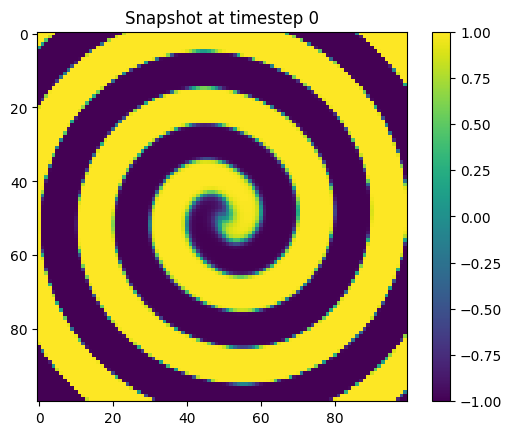

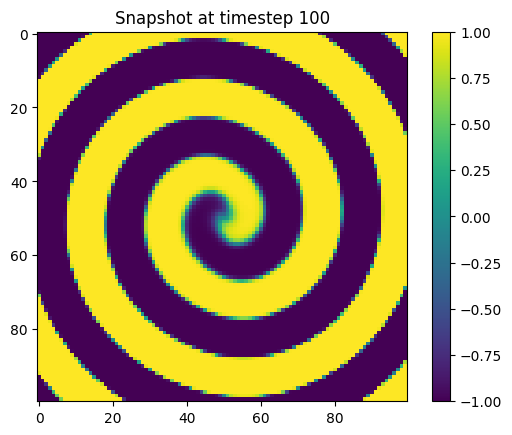

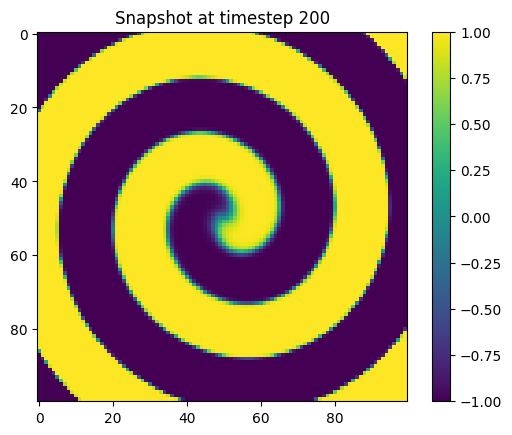

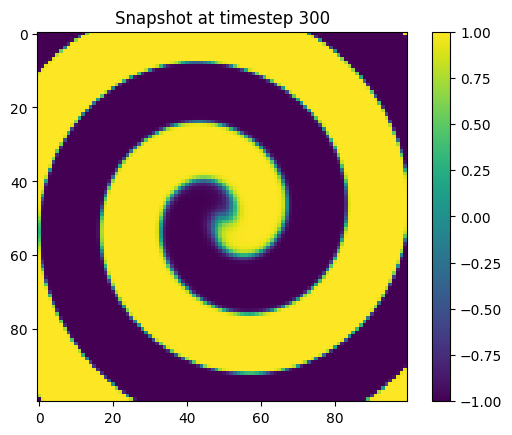

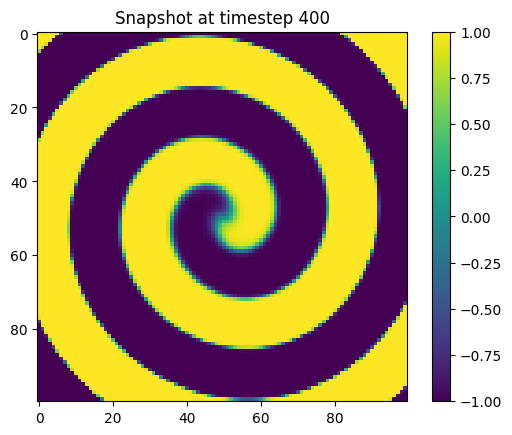

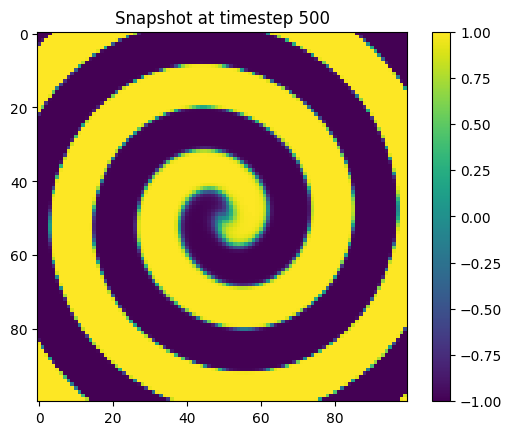

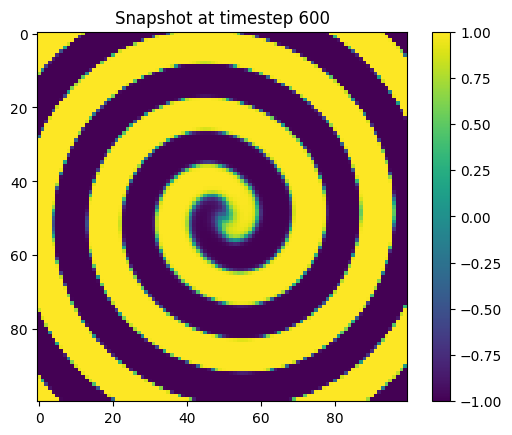

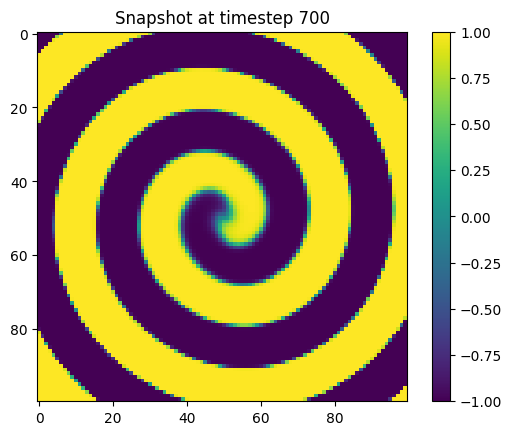

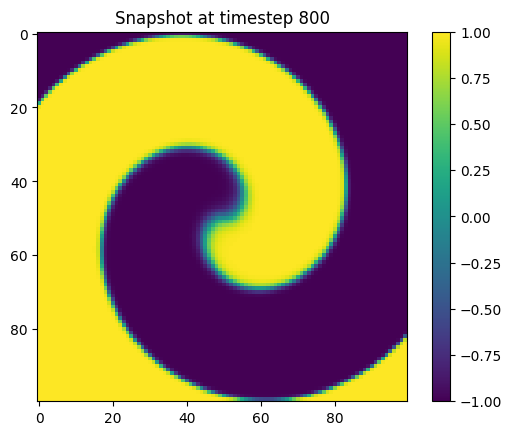

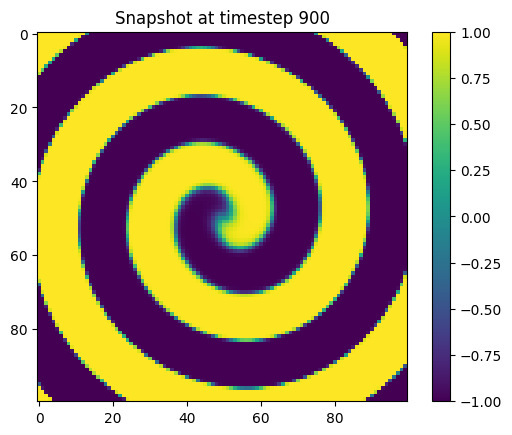

In [103]:
for i in range(0, 10*n, n):
  plt.imshow(Td[:, :, i])
  plt.title(f"Snapshot at timestep {i}")
  plt.colorbar()
  plt.show()

:
Task 2: compute the SVD of the matrix and visualize the first basis functions.

In [104]:
[U,S,V] = np.linalg.svd(Xd)

In [105]:
U.shape, S.shape, V.shape

((10000, 10000), (1000,), (1000, 1000))

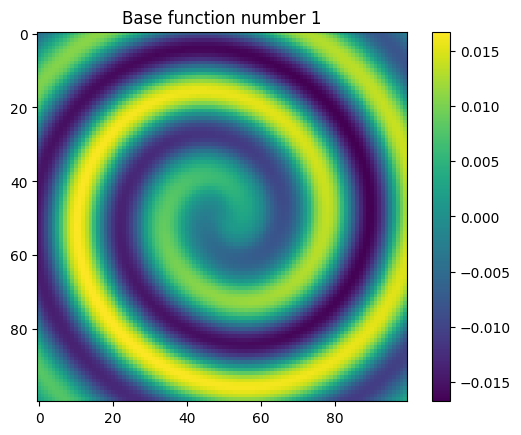

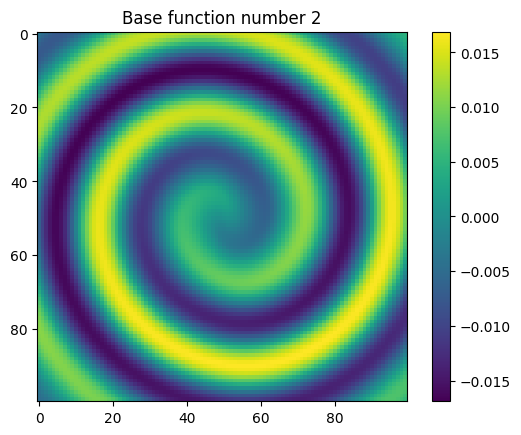

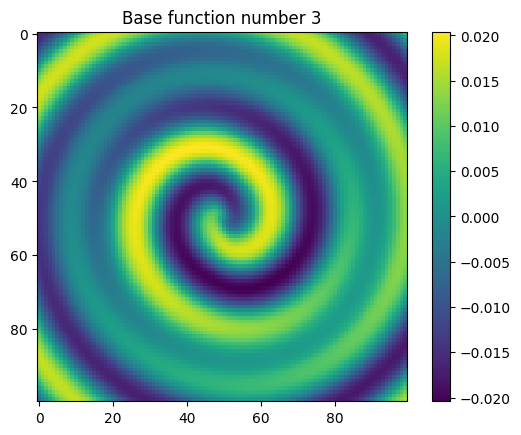

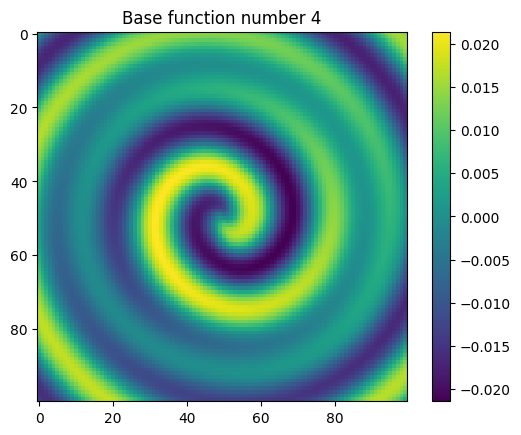

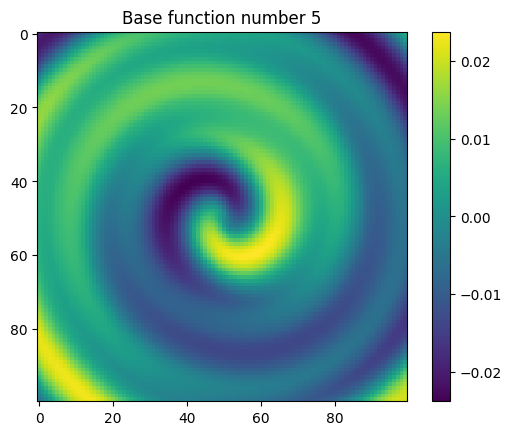

In [106]:
# to do: plot basis functions
num_base_function = 5

for k in range(num_base_function):
  U_k = U[:, k].reshape(len(x), len(y))
  plt.imshow(U_k)
  plt.title(f"Base function number {k+1}")
  plt.colorbar()
  plt.show()


Test set

In [107]:
count_samples = 0

Xd_test=np.zeros((len(x)**2,5*n))
Td_test=np.zeros((len(x),len(x),5*n))
for ind_random in range(5):
    param = np.random.rand(1)
    print(param)
    for ind_sample in range(n):
        count = 0
        for ind_x in range(len(x)):
            for ind_y in range(len(y)):
                # case 1
                u = np.tanh(np.sqrt(x[ind_x]**2+y[ind_y]**2) * np.cos(np.angle(x[ind_x]+y[ind_y]*(0+(1.0+param)*1j))-(0.5)*(np.sqrt(x[ind_x]**2+y[ind_y]**2))+ ind_sample/10) )
                # case 2
                #u = np.tanh(np.sqrt(x[ind_x]**2+y[ind_y]**2) * np.cos(np.angle(x[ind_x]+y[ind_y]*(0+(1.0+param)*1j))-(0.1+0.9*param)*(np.sqrt(x[ind_x]**2+y[ind_y]**2))+ ind_sample/10) )

                Xd_test[count,count_samples] = u
                count += 1

                Td_test[ind_x,ind_y,count_samples] = u

        count_samples += 1

[0.36727247]


<ipython-input-107-158ffbd8c949>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Xd_test[count,count_samples] = u
<ipython-input-107-158ffbd8c949>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Td_test[ind_x,ind_y,count_samples] = u


[0.36717826]
[0.48337496]
[0.0437908]
[0.64209732]


In [108]:
perm = [ 50*100+7, 50*100+10, 50*100+17, 50*100+20,
         57*100+7, 60*100+10, 67*100+17, 70*100+20,
         57*100-7, 60*100-10, 67*100-17, 70*100-20,
         43*100-7, 40*100-10, 33*100-17, 30*100-20,
         43*100+7, 40*100+10, 33*100+17, 30*100+20]

# alternative
#p = 100
#perm = np.random.choice(n*n, size=p, replace=False)


p = len(perm)

C = np.zeros((p,n*n))
for i in range(p):
    C[i,perm[i]] = 1.0

In [109]:
# data
u = Xd_test[:,233]

y = C @ u


Task 4: solve the reconstruction problem using compressed sensing. Consider the case where $\Psi$ is composed by all the solutions stored in Xd and the case where $\Psi$ is composed by the first 500 columns of U.

In [113]:
# compressed sensing problem
k = 500
#Psi = U[:, :k]
Psi = Xd

Theta = C @ Psi

In [114]:
# solving with CVX

# Create vector variables (CVXPY Variable)
s_c = cvx.Variable(Psi.shape[1])
# Create the constraints (Python list)
constraints = [Theta @ s_c == y]
# Form objective
obj = cvx.Minimize(cvx.norm(s_c, 1))
# Form and solve problem
prob = cvx.Problem(obj, constraints)
prob.solve()  # Returns the optimal value.
print("status:", prob.status)
print("optimal value", prob.value)
print("optimal var", s_c.value)

urec = Psi @ s_c.value

status: optimal
optimal value 1.0000000120914587
optimal var [ 6.96016005e-13 -3.77751183e-12 -6.00243111e-12 -5.40039103e-12
 -6.02956732e-12 -1.24946881e-11 -4.54844167e-12 -4.36197165e-12
 -4.49373162e-12 -4.42603705e-12 -2.54414049e-12  4.92216656e-12
 -1.03690149e-11 -1.29471354e-10  1.14994176e-12  5.85886785e-10
  1.75032078e-08  2.05215898e-06  4.48808502e-09  2.82861429e-10
  1.73621164e-10  3.67317379e-10  1.02326557e-10 -5.06936880e-11
  4.41404447e-12  1.23335876e-11  5.23931811e-12 -1.32595336e-12
 -2.14165385e-12 -2.18221914e-12 -2.12804887e-12 -1.56980386e-12
  1.78350246e-12  5.47789761e-12  6.04818253e-12  3.91008014e-12
  1.21168906e-11  7.40695615e-12  4.12080550e-12  4.47875395e-12
  4.48269282e-12  3.96658519e-12 -2.57388492e-12 -2.11411520e-12
  8.33056764e-11  3.77216533e-11 -1.32504470e-10 -4.36570485e-09
 -8.94487158e-08 -2.09728128e-07 -7.62682521e-10 -1.44232126e-10
 -3.08849720e-10 -2.62772394e-10  3.28674338e-11  2.10696364e-11
 -1.45861407e-11 -8.60555418e

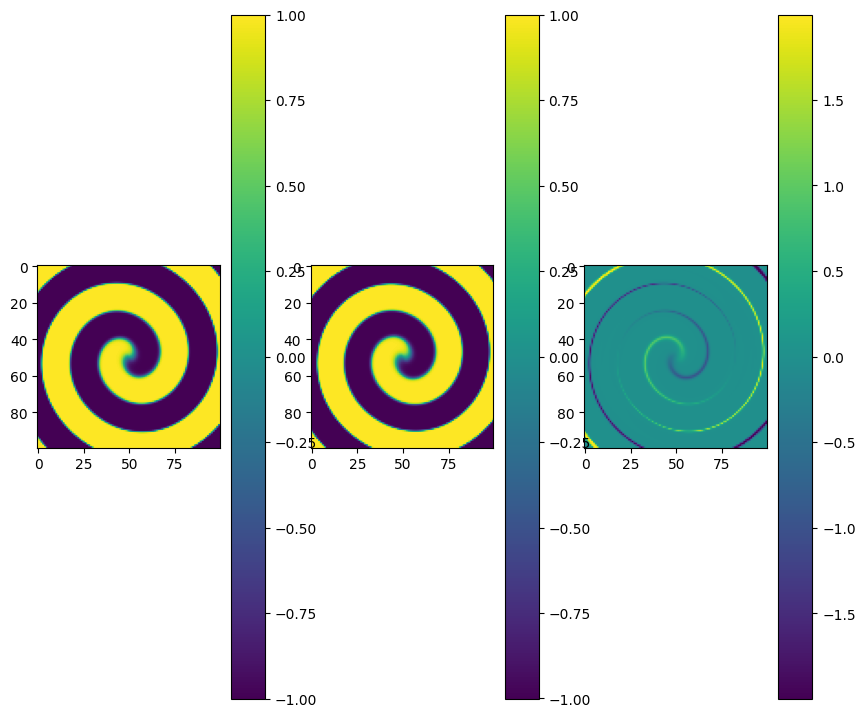

In [121]:
fig,axs = plt.subplots(1,3, figsize = (10, 30))

im0 = axs[0].imshow( np.reshape(u,(n,n) ) )
plt.colorbar(im0)

im1 = axs[1].imshow( np.reshape(urec,(n,n) ) )
plt.colorbar(im1)

im2 = axs[2].imshow( np.reshape(urec-u,(n,n) ) )
plt.colorbar(im2)